In [10]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


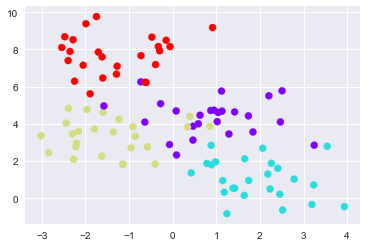

In [1]:
X, y = make_blobs(n_samples=100, centers=4, cluster_std=1.0, random_state=0)

plt.scatter(X[:, 0], X[:, 1], s=50, c=y, cmap='rainbow')

In [8]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # plot the training points
    ax.scatter(X[:, 0], X[:, 1], s=50, c=y, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # create color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.5,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)
    ax.set(xlim=xlim, ylim=ylim)

C:\Users\Lenovo\AppData\Roaming\Python\Python36\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


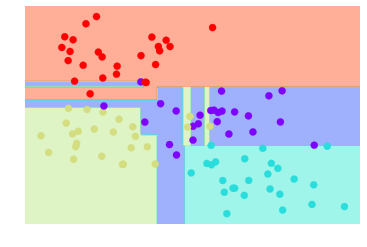

In [9]:
visualize_classifier(DecisionTreeClassifier(), X, y)

C:\Users\Lenovo\AppData\Roaming\Python\Python36\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


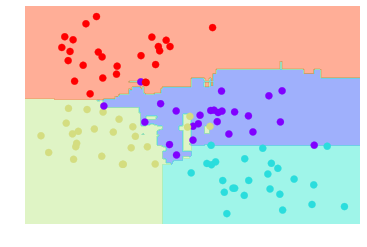

In [11]:
visualize_classifier(RandomForestClassifier(n_estimators=100, random_state=0), X, y)